# Introduction to Fourier Series

## Objectives:

* Look at histogram performance study
* Cover the mathematics of Fourier Series
* Look at DFT

### Performance study
Henry Schreiner have written an interesting look at 1D and 2D histogram performance here: <https://iscinumpy.gitlab.io/post/histogram-speeds-in-python/>

### Bokeh

The plotting library Bokeh has just reached version 1.0. We'll use that today instead of matplotlib just to make things interesting. It's not as old and respected as matplotlib, but is prettier in a browser.

In [1]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

output_notebook()

Loading BokehJS ...

In [2]:
import numpy as np

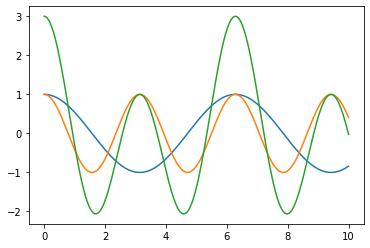

In [3]:
t=np.linspace(0,10,200)
t[:10]
import matplotlib.pyplot as plt
omega=1.0
plt.plot(t,np.cos(omega*t))
plt.plot(t,np.cos(2*omega*t))
plt.plot(t,np.cos(omega*t)+2*np.cos(2*omega*t))

## Fourier series

Our goal will be to decompose (periodic) functions into Fourier components. A few definitions:

$T$ is the period. $\omega = \frac{2\pi}{T}$ is the true frequency. The Fourier series is then written:

$$
y(t) = \frac{a_0}{2} + \sum_{n=1}^{\infty} \left( a_n \cos n \omega t + b_n \sin n \omega t \right)
\tag{1}
$$

We can compute it by integrating over the function of interest and computing the components:

$$
\left(\begin{matrix}a_n \\ b_n\end{matrix}\right)
=
\frac{2}{T} \int^{T}_{0}
\left(\begin{matrix}\cos n \omega t \\ \sin n \omega t \end{matrix}\right) y(t) \, dt
\tag{2}
$$

Useful tips:
* $a_0 = \left<y(t)\right>$
* For odd or even functions, we can drop cos or sin (respectively) and integrate over 1/2 the range.

#### Example: Step function

Let's define a step function valid from $-L$ to $L$ (it repeats outside that range). We have:

$$
f(t) = \begin{cases}1 & t \ge 0 \\
                   -1 & t < 0\end{cases}.
$$

This is odd, so we only need to integrate from $0$ to $L=T/2$ and multiply by 2. The average value is 0, so we can drop $a_0$. We have $\omega = 2\pi / T = \pi / L$ So equation 2 becomes:

$$
b_n =2 \frac{1}{L} \int^{L}_0 \sin \frac{n \pi t}{L} \, dt.
$$

Since $\int_0^A \sin a t \, dt = \frac{1 - \cos(a A)}{a}$, we have:

$$
b_n = \frac{2}{L} \frac{L}{n \pi} \left( 1 - \cos n \pi \right),
$$

which is non-zero only for odd n, giving the final formula:

$$
b_n = \frac{4}{n \pi}, \quad n\ \textrm{odd}.
$$

Combining with equation 1 gives:

$$
f(t) = \frac{4}{\pi} \sum^{\infty}_{n=1,3,5,\ldots} \frac{1}{n} \sin\left( \frac{n \pi t}{L} \right).
$$

In [4]:
t = np.linspace(-1.25 * np.pi, 1.25 * np.pi, 2000)
y = np.zeros_like(t)
for n in range(1, 100, 2):
    y += 1 / n * np.sin(n * t)
y *= 4 / np.pi

In [5]:
p = figure(width=500, height=300)
p.line(t, y)
show(p)

The function is a best fit to the sawtooth, but it always "overshoots" the edges - this is the Gibbs phenomenon.

We can also look at the spectrum of frequencies:

In [6]:
x = np.arange(1, 100)
s = 4 / (np.pi * x)
s[1::2] = 0

p = figure(width=500, height=300)
p.vbar(x - 0.5, 1, s)
show(p)

#### Example: Sawtooth function

From the book, Example 10.2.1.

$$
y(t) = \frac{2}{\pi} \biggr[ \sin \omega t - \sin 2 \omega t + \sin 3 \omega t - \cdots \biggr]
$$

In [7]:
x = np.linspace(-2.5 * np.pi, 2.5 * np.pi, 2000)
y = np.zeros_like(x)
L = 2 * np.pi
for n in range(1, 100):
    y += 1 / n * (-1) ** (n + 1) * np.sin(2 * n * np.pi * x / L)
y *= 2 / np.pi

In [8]:
p = figure(width=500, height=300)
p.line(x, y)
show(p)

We can also look at the spectrum of frequencies:

In [10]:
x = np.arange(1, 50)
s = (-1) ** (x + 1) * 2 / (np.pi * x)

p = figure(width=500, height=300)
p.vbar(x - 0.5, 1, s)
show(p)

### Fourier transform

Now briefly look at the Fourier transform, using the complex exponential function. Computationally, we will be converting the integrals to series anyway, so this becomes equivalent to the Fourier series.

$$
y(t) = \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{\infty} e^{i \omega t} Y(\omega) \, d\omega.
\tag{3}
$$

And its inverse:

$$
Y(\omega) = \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{\infty} e^{- i \omega t} y(t) \, dt.
\tag{4}
$$

You'll notice that different conventions exist for the sign and the location of the scaling factor - just be consistent and you'll be okay. We will follow the book's lead here.

We can apply the transform and the inverse together to obtain the Dirac delta function:

$$
\int_{-\infty}^{\infty} e^{i (\omega' - \omega) t}\, dt \equiv 2 \pi \delta (\omega' - \omega)
$$

This "function" is useful analytically because it can select on point out of an integration range, but ugly computationally. You should do it by hand before coding, rather than later.

### DFT: The Discrete Fourier Transform

Fourier tools are great for analysis (as long as you remember their limitations). Real measurements generally are discrete. So we need a discrete version of this machinery.

We start with a signal $y(t)$ sampled in $N$ time intervals ($N+1$ measurements). We can assume constant time spacing $h \equiv \Delta t$. The total time is $T$ (carefully selected to look like a period as well, we'll see more later). We have a sampling rate $s \equiv N/T=1/h$ So:

$$
y_k \equiv y(t_k) \\
t_k \equiv k h
$$

At this point, we can view this Fourier transform as a Fourier Series, since we now have a periodicity imposed; the final measurement must be equal to the first $y_0 = y_N$.

Since we only have $N$ data points (left), we can only determine $N$ independent output Fourier components. We can write all the frequencies as multiples of the base frequency:

$$
\omega_n = n \omega_1 = n \frac{2 \pi}{N h}
$$

### DFT: Evaluation  (Discrete Fourier Transform)

Now we can evaluate the integral in (3). We can just evaluate over the range 0 to T (due to above requirements on periodicity), and we can use the trapezoid rule. Since the first point is equal to the last point, we don't even need special handling at the end points.

Forward transform:

$$
Y_n \equiv \frac{1}{h} Y(\omega_n) \approx \sum_{k=1}^{N} y_k \frac{e^{-2 \pi i k n / N}}{\sqrt{2 \pi}}
\tag{5}
$$

And inverse:

$$
y(t) \approx \sum_{n=1}^{N} \frac{2 \pi}{N h} Y_n \frac{e^{i \omega_n t}}{\sqrt{2 \pi}}
\tag{6}
$$

Let's add one more trick to make this easier to compute: we will introduce $Z=e^{-2\pi i / N}$, and rewrite the above expressions as

$$
y_k = \frac{\sqrt{2 \pi}}{N} \sum_{n=1}^{N} Z^{-n k} Y_n
$$

$$
Y_n = \frac{1}{\sqrt{2 \pi}} \sum_{k=1}^{N} Z^{n k} y_k
$$

In [3]:
N = 50
x = np.linspace(0, 2 * np.pi, N + 1)
print(x.shape)
signal = 30 * np.cos(3 * x) + 20 * np.sin(7 * x)  # Change these values
h = 2 * np.pi / N

(51,)


In [4]:
p = figure(width=500, height=300)
p.circle(x, signal)
show(p)

In [5]:
n = np.arange(N).reshape(-1, 1)
print(n.shape)
k = np.arange(N).reshape(1, -1)
zexpo = 1j * 2 * np.pi * k * n / N
print(zexpo.shape)
zsum = np.sum(signal[:N] * np.exp(-zexpo), axis=1)
dftz = zsum / np.sqrt(2 * np.pi)

(50, 1)
(50, 50)


Note: Formula taken from the book. I think there may be a missing element on the end - but due to symmetric nature, the end element would be the same as the beginning element, so we don't lose anything.

In [6]:
p = figure(width=500, height=300)
# ravel function A 1-D array, containing the elements of the input, is returned
print(k)
print(k.ravel())
p.line(k.ravel(), dftz.real)
p.line(k.ravel(), dftz.imag, color="firebrick")
show(p)

[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
  48 49]]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


In [7]:
zfft = np.fft.fft(signal)
p = figure(width=500, height=300)
p.line(np.arange(N + 1), zfft.real)
p.line(np.arange(N + 1), zfft.imag, color="firebrick")
show(p)

#### Example: Not perfectly aligned sin waves

We'll use the FFT to compute and look at a problem where the frequencies are not quite so perfectly aligned. This example is taken from the SciPy documentation, but is implemented in Numpy and Bokeh.

In [8]:
N = 600
T = 1.0 / 800.0
x = np.linspace(0.0, N * T, N)
y = np.sin(50.0 * 2.0 * np.pi * x) + 0.5 * np.sin(80.0 * 2.0 * np.pi * x)
yf = np.fft.fft(y)
xf = np.linspace(0.0, 1.0 / (2.0 * T), N)

norm_yf = 2.0 / N * np.abs(yf)

In [9]:
p = figure(width=500, height=300)
p.line(x, y)
show(p)

In [10]:
p = figure(width=500, height=300)
p.line(xf[: N // 2 + 1], norm_yf[: N // 2 + 1])
show(p)

#### Questions:

* What happens when you plot in the entire range instead of just to N?
* Try `rfft` with the full range.

Let's look at that in more detail: (the description [here](https://www.fil.ion.ucl.ac.uk/~wpenny/course/fourier.pdf) is good).

In [11]:
t = np.linspace(0, 1, 1000)
f0 = 13  # Sampling frequency
f1 = 3  # First frequency
k = 1  # Any integer
f2 = f1 + k * f0  # Identical under the sampling frequency!
tp = np.linspace(0, 1, f0 + 1)
y1 = np.sin(2 * f1 * np.pi * t)
y2 = np.sin(2 * f2 * np.pi * t)
ytp = np.sin(2 * f2 * np.pi * tp)

In [12]:
p = figure(width=700, height=300)
p.line(t, y1)
p.line(t, y2, color="firebrick")
p.circle(tp, ytp, color="black")
show(p)

## Spinning Circles Fourier Visualization in Python/Matplotlib from Alex Miller

The whole idea of Fourier is the following. Let say we have a vector $\vec{a} = (1,2,3)$, we can write this vector as $\vec{a} = 1 \hat{i} + 2 \hat{j} + 3 \hat{k}$, where $\hat{i}, \hat{j}, \hat{k}$ are the canonical basis vectors. Now Fourier is then also a canonical basis but for an infinite dimensional vector space.

The set of functions $\sin (n x)$ and $\cos (n x)$ (n an integer) forms an orthonormal basis for periodic functions (with respect to the inner-product defined by integration over $-\pi,\pi$. Therefore, the set of sine and cosine functions with integer frequencies actually can span the whole space of arbitrary single-variable functions as
$$
f(x) = \sum_{n=0}^\infty a_n \cos \left( \frac{2 \pi n x}{L} \right) +  b_n \sin \left( \frac{2 \pi n x}{L} \right)
$$

The Fourier expansion of a single-variable real-valued function can be thought of as the real component of a more generalized expansion that makes use of Euler’s formula ($c_n$ is now a complex number):
$$
f(x) = \sum_{n=0}^\infty c_n e^{2 \pi i n \frac{x}{L}}
$$

Now,  Euler’s formula is the real star here, which allows us to cleanly decompose each point in the complex plane into an angle (the argument to the exponential function) and an amplitude (the $c_n$ coefficients).

Therefore, a simple sum of complex numbers in terms of phases/amplitudes can be nicely visualized as a set of concatenated circles in the complex plane. Each red line is a vector representing the a term in the sequence of summands $c_n e^{2 \pi i n \frac{x}{L}}$. 

Now, that you got the picture, If you have a line drawing in 2-dimensional (x-y) space, you can describe this path mathematically as a parametric function, which is essentially just two separate single variable functions, both in terms of an auxiliary $f(t)=(x(t),y(t))$. After you find the parametric plot, you need to find the Fourier approximations of these two paths, and use coefficients from this approximation to determine the phase and amplitudes of the circles needed for the final visualization. What you will see below is mainly meant to be a light introduction to the underlying concepts behind this visualization, so for any more of the specific implementation details on how to create the animation.

Let us start with a very simple example:


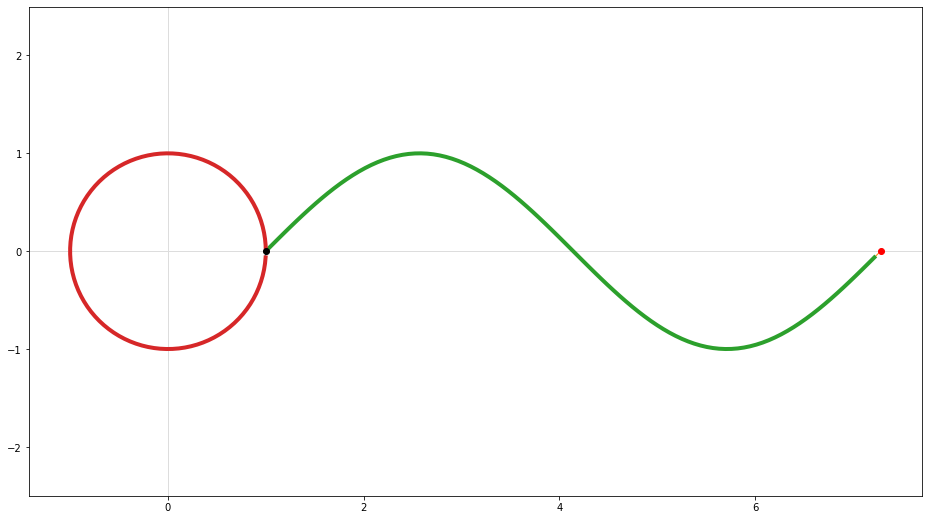

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from pylab import rcParams
from IPython.display import HTML

rcParams['figure.figsize'] = 16, 9

fig, ax = plt.subplots(1,1)
plt.axis('equal')

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([-2.5, 2.5])

# sine function plot
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

# x axis path
ax.plot(3*x - 3, 0*y, linewidth=1, color='#dddddd')
# y axis path
ax.plot(0*x, 2.5*y, linewidth=1, color='#dddddd')

# unit circle path
ax.plot(np.cos(x), np.sin(x), linewidth=1)
# sine path
ax.plot(x + 1, np.sin(x), linewidth=1)


# ------ anim -------
sineLine, = ax.plot([], [], linewidth=4)
sineDot, = ax.plot([], [], 'o', color='#ff0000')

circleLine, = ax.plot([], [],linewidth=4)
circleDot, = ax.plot([], [], 'o', color='black')

def sineAnim(i):
    # sine anim
    sineLine.set_data(x[:i] + 1,y[:i])
    sineDot.set_data(x[i] + 1, y[i])
    # circle anim
    circleLine.set_data(np.cos(x[:i]), np.sin(x[:i]))
    circleDot.set_data(np.cos(x[i]), np.sin(x[i]))

anim = animation.FuncAnimation(fig, sineAnim, frames=len(x), interval=50)
# -------------

# anim.save('sine-py-effect.mp4', writer='ffmpeg')

HTML(anim.to_html5_video())

In [19]:
# Let see a cool application of this
# Main imports/Initialization
%matplotlib inline
import matplotlib
from matplotlib import animation, rc
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from IPython.display import HTML
import numpy as np
from PIL import Image, ImageEnhance
import requests
from io import BytesIO
from copy import deepcopy
from scipy.spatial import distance
from scipy.interpolate import UnivariateSpline
from copy import deepcopy

# Default figure size in notebook
matplotlib.rcParams['figure.figsize'] = (6,6)
matplotlib.rcParams['image.aspect'] = 'equal'

In [20]:
# The ImageObject class below provides functions for extracting a path of coordinates 
# from a simplistic monochrome image. This path forms the basis of the parametric functions 
# that I will be approximating using Fourier series.

class ImageObject:
    def __init__(self, url):
        self.url = url
        response = requests.get(url)
        self.img = Image.open(BytesIO(response.content))
        self.og_size = self.img.size
    
    def show(self):
        imshow(np.asarray(self.img))

    def monochrome(self, scale=3, threshold=200):
        
        # convert image to monochrome
        image = self.img.convert('L')
        image_array = np.array(image)
        
        # Binarize a numpy array using threshold as cutoff
        for i in range(len(image_array)):
            for j in range(len(image_array[0])):
                if image_array[i][j] > threshold:
                    image_array[i][j] = 255
                else:
                    image_array[i][j] = 0
        
        image = Image.fromarray(image_array)
        
        # scale image down to reduce number of non-zero pixels
        img_sm = image.resize(tuple([int(v/scale) for v in image.size]),Image.ANTIALIAS)
        
        # convert image to black and white
        img_bw = img_sm.convert(mode='1', dither=2) 
        self.bw_img = img_bw
        self.pixels = (1 - np.asarray(img_bw).astype(int))
        self.pixels_flat = np.reshape(self.pixels, self.pixels.size)
    
    def show_bw(self):
        print("Dimensions: {}".format(self.bw_img.size))
        print("Num. pixels: {}".format(self.pixels.sum()))
        imshow(np.asarray(self.bw_img))
    
    def get_tour(self, starting_point="random", plot=True):
        # Get greedy tour through pixels
        
        absolute_index = np.where(self.pixels_flat > 0)[0] # positions of non-zero pixels
        relative_index = np.array(range(1, len(absolute_index)+1 ))
        
        # Replace each non-zero pixel in the array with its number
        # i.e., the 10th non-zero pixel will have 10 in its place
        flat_img_mod = deepcopy(self.pixels_flat)
        for rel, pix in enumerate(absolute_index):
            flat_img_mod[pix] = rel+1
        
        # Get coordiantes for each non-zero pixel
        img_idx = np.reshape(flat_img_mod, self.pixels.shape)
        self.coord_list = []
        for p1 in relative_index:
            p1_coords = tuple([int(c) for c in np.where(img_idx==p1)])
            self.coord_list.append(list(p1_coords))
        
        # Calcualte distance between each pair of coords
        dist_mat = distance.cdist(self.coord_list, self.coord_list, 'euclidean')

        # Initialize search space with nearest neighbor tour
        cities = self.coord_list
        num_cities = len(cities)
        if starting_point=="random":
            start = int(np.random.choice(range(num_cities),size=1))
        else:
            assert starting_point < num_cities
            start = starting_point
        tour = [start]
        active_city = start
        for step in range(0, num_cities):
            dist_row = deepcopy(dist_mat[active_city,:])
            for done in tour:
                dist_row[done] = np.inf
            nearest_neighbor = np.argmin(dist_row)
            if nearest_neighbor not in tour:
                tour.append(nearest_neighbor)
            active_city = nearest_neighbor

        y_tour = -np.array([cities[tour[i % num_cities]] for i in range(num_cities+1) ])[:,0]
        y_tour = y_tour - y_tour[0]#- min(y_tour)
        x_tour = np.array([cities[tour[i % num_cities]] for i in range(num_cities+1) ])[:,1]    
        x_tour = x_tour - x_tour[0]#- min(x_tour)

        # Circle tour back to beginning
        np.append(x_tour, x_tour[0])
        np.append(y_tour, y_tour[0])
        num_cities = num_cities + 1
    
        self.x_tour = x_tour
        self.y_tour = y_tour
        self.num_pixels = num_cities
        
        if plot:
            plt.plot(self.x_tour, self.y_tour)
            
    def get_splines(self, degree=1, plot=True):
        # Convert tours into parametric spline curves
        
        x_spl = UnivariateSpline(list(range(0,self.num_pixels)), self.x_tour, k=degree)
        y_spl = UnivariateSpline(list(range(0,self.num_pixels)), self.y_tour, k=degree)
        
        self.x_spl = x_spl
        self.y_spl = y_spl
        
        if plot:
            p = plt.plot(*zip(*[(x_spl(v), y_spl(v)) for v in np.linspace(0, self.num_pixels-1, 1000)]))

            
    def plot_parametric(self, num_points=1000):
        # num_points = number of points at which to sample the curves
        t_vals, x_vals = zip(*[
            (v, self.x_spl(v)) for v in np.linspace(0, self.num_pixels, num_points)
        ])
        x_vals = np.array(x_vals)
        y_vals = np.array([self.y_spl(v) for v in np.linspace(0, self.num_pixels, num_points)])
        t_vals = np.array(t_vals)

        plt.plot(t_vals, x_vals)
        plt.plot(t_vals, y_vals)

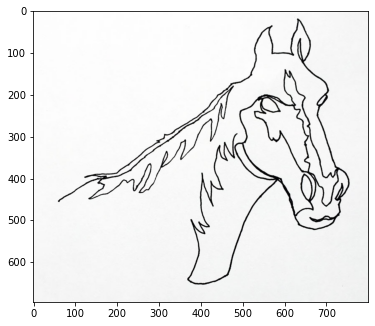

In [21]:
# Initialize an ImageObject instance and view the Image
# Obviously, it helps to have a simple image with only 2 colors and 
# close to a single path
url = "http://thevirtualinstructor.com/images/continuouslinedrawinghorse.jpg"
horse = ImageObject(url)
horse.show()

Dimensions: (266, 231)
Num. pixels: 2981


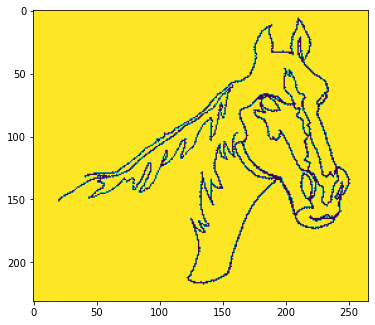

In [22]:
# Scale the image down by a factor of 3 
# and binarize the pixels using a threshold of
# 200 (out of the 0-255 scale) as my cutoff
horse.monochrome(scale=3, threshold=200)
horse.show_bw()

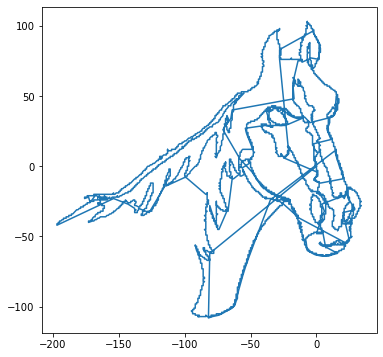

In [23]:
# Get a tour through the coordinate space of pixels
# Experiment with various starting points until the
# final result looks reasonably simple without too
# many jumps
horse.get_tour(starting_point=1300)

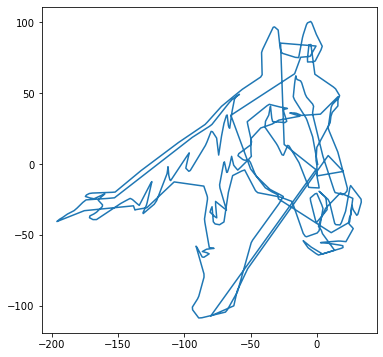

In [24]:
# Get parametric spline functions of the tour
horse.get_splines()

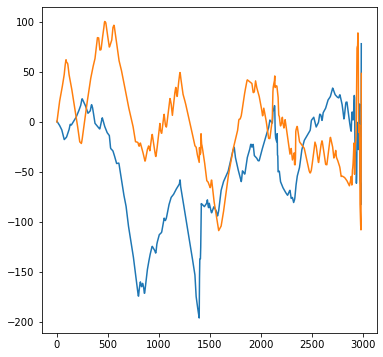

In [25]:
# Plot the x/y splines as parametric functions
# of a separate varaible, t
horse.plot_parametric()

In [26]:
class FourierTransform:
    """Calculate the complex Fourier coefficients for a given function
    """
    def __init__(self,
            fxn,  # Function to be transformed (as Python function object)
             # Note: y is parameterized by its own index
             # 13th value in array = value of function at t=12
            rnge, # (.,.) tuple of range at which to evaluate fxn
            N=500,  # Number of coefficients to calculate
            period=None,  # If different than full length of function
            num_points=1000, # Number of points at which to evalute function
            num_circles=50 # This is needed to calculate proper offsets
        ):
        
        self.num_circles = num_circles
        
        t_vals, y = zip(*[(v, fxn(v)) for v in np.linspace(rnge[0], rnge[1]-1, num_points)])
        t_vals = np.array(t_vals)        
        self.t_vals = t_vals
        
        
        # Save the original coords when plotting
        y = np.array(y)
        y = y - y[0]
        self.fxn_vals = np.array(deepcopy(y))
        
        # Spline function doesn't make endpoints exactly equal
        # This sets the first and last points to their average
        endpoint = np.mean([y[0], y[-1]])
        y[0] = endpoint
        y[-1] = endpoint
        
        # Transform works best around edges when function starts at zero
        # (Can't figure out how to avoid Gibbs-type phenomenon when 
        #  intercept !=0 )
        y = y - y[0]
        
        self.N = N
        if period==None:
            period = rnge[1]
        self.period = period
            
        def cn(n):
            c = y*np.exp(-1j*2*n*np.pi*t_vals/period)
            return(c.sum()/c.size)

        coefs = [cn(i) for i in range(1,N+1)]
        self.coefs = coefs
        self.real_coefs = [c.real for c in self.coefs]
        self.imag_coefs = [c.imag for c in self.coefs]
        
        self.amplitudes = np.absolute(self.coefs)
        self.phases = np.angle(self.coefs)
        
        
        def f(x, degree=N):
            # Evaluate the function y at time t using Fourier approximiation of degree N
            f = np.array([2*coefs[i-1]*np.exp(1j*2*i*np.pi*x/period) for i in range(1,degree+1)])
            return(f.sum())
        
        # Evaluate function at all specified points in t domain
        fourier_approximation = np.array([f(t, degree=N).real for t in t_vals])
        circles_approximation = np.array([f(t, degree=self.num_circles).real for t in t_vals])
        
        # Set intercept to same as original function
        #fourier_approximation = fourier_approximation - fourier_approximation[0] + self.original_offset 
        
        # Adjust intercept to minimize distance between entire function, 
        # rather than just the intercepts. Gibbs-type phenomenon causes
        # perturbations near endpoints of interval
        fourier_approximation = fourier_approximation - (fourier_approximation - self.fxn_vals).mean()
        
        circles_approximation = circles_approximation - (circles_approximation - self.fxn_vals).mean()
        self.circles_approximation = circles_approximation
        
        # Origin offset
        self.origin_offset = fourier_approximation[0] - self.fxn_vals[0]
        
        # Circles offset
        self.circles_approximation_offset = circles_approximation[0] - self.fxn_vals[0]
        
        # Set intercept to same as original function
        self.fourier_approximation = fourier_approximation

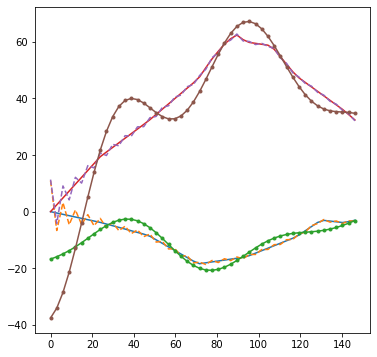

In [27]:
# Calculate Fourier approximations; initialize NC equal to the
# number of circles the final animation will have to get an 
# accurate view of how well the image will be approximated
NC = 50
xFT = FourierTransform(horse.x_spl, (0, horse.num_pixels), num_circles=NC)
yFT = FourierTransform(horse.y_spl, (0, horse.num_pixels), num_circles=NC)

# Plot the full approximation and the NC-degree 
# approximation for t from 1-R
R = 50
plt.plot(xFT.t_vals[0:R], xFT.fxn_vals[0:R])
plt.plot(xFT.t_vals[0:R], xFT.fourier_approximation[0:R], "--")
plt.plot(xFT.t_vals[0:R], xFT.circles_approximation[0:R], ".-")

plt.plot(yFT.t_vals[0:R], yFT.fxn_vals[0:R])
plt.plot(yFT.t_vals[0:R], yFT.fourier_approximation[0:R], "--")
plt.plot(yFT.t_vals[0:R], yFT.circles_approximation[0:R], ".-")

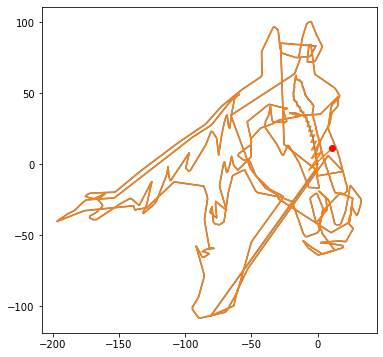

In [28]:
# Visualize the approximation as 2D image
plt.plot(xFT.fxn_vals, yFT.fxn_vals)
plt.plot(xFT.fourier_approximation, yFT.fourier_approximation)
plt.plot(xFT.fourier_approximation[0], yFT.fourier_approximation[0], 'o', color='red')

In [29]:
#  Calculate positions of each circle throughout cycle

class ComplexCircles:
    """Complex Circles Class:
        Tracks radii and centers of circles implied by 
        Fourier decomposition of given FourierTransform object
    """
    def __init__(self,
                 FT, # FourierTransform object
                 num_circles=20, # Number of circles to keep track of
                 t_init=0, # Initial time state of object
                 origin=(0, 0) # Center of the first circle
        ):
        self.FT = FT
        self.t_init = t_init
        if num_circles > FT.N:
            raise Exception("num_circles exceeds the degree of the given Fourier series.")
        self.num_circles = num_circles
        self.origin = origin
        self.origin_x = origin[0]
        self.origin_y = origin[1]
        self.t_elapsed = 0
        self.steps_elapsed = 0
        self.t_current = self.t_init
        self.t_index_current = 0
        self.true_fxn_val_current = self.FT.fxn_vals[t_init]
        self.fourier_approx_val_current = self.FT.fourier_approximation[t_init]
        
        self.Xs = [] # Track the coords of the center of the last circle
        self.Ys = [] # for each value of t 
        
        self.As = FT.amplitudes[0:num_circles] # Amplitude of each frequency/circle
        self.Zs = FT.phases[0:num_circles] # Phase of each frequency/cirlce
    
    def circle_positions(self, transpose=False):
        """compute the current radii and centers of each circle at the current value of t"""
        
        num_circles = self.num_circles
        t = self.t_current
        
        running_x_offset = deepcopy(self.origin_x)
        running_y_offset = deepcopy(self.origin_y)

        # There will be 1 more center than radius;
        # Use this to plot the last point on the last circle
        # Stored in final_x, final_y below
        radii = []
        x_centers = [deepcopy(self.origin_x)]
        y_centers = [deepcopy(self.origin_y)]
        
        for i in range(0,num_circles):
            freq = i+1 # Corresponding frequency for given circle/coefficient
            a = self.As[i] # Magnitude (i.e., amplitude) of complex coefficient
            z = self.Zs[i] # Argument (i.e., phase) of complex coefficient

            radius = 2*a
            radii.append(radius)
            
            running_x_offset += 2*a*np.cos(t*2*np.pi*freq/self.FT.period + z)
            running_y_offset += 2*a*np.sin(t*2*np.pi*freq/self.FT.period + z)
            
            if i < num_circles-1:
                x_centers.append(running_x_offset)
                y_centers.append(running_y_offset)
            
        if t==0:
            self.circles_offset = running_x_offset
        radii = np.array(radii)
        x_centers = np.array(x_centers) - self.circles_offset + self.FT.origin_offset
        y_centers = np.array(y_centers)
        
        x_final = running_x_offset - self.circles_offset + self.FT.origin_offset
        y_final = running_y_offset
        
        self.Xs.append(x_final)
        self.Ys.append(y_final)
        
        if transpose:
            return(radii, -y_centers, x_centers, -y_final, x_final)
        return(radii, x_centers, y_centers, x_final, y_final)
    
    
    def get_circles(self, transpose=False):
        return(self.circle_positions(transpose=transpose))
    
    def step(self, dt=1):
        # dt = how many times to increment t_vals array for each step
        self.steps_elapsed += 1
        next_index = dt*self.steps_elapsed 
        if next_index > len(self.FT.t_vals)-1:
            print("Max t-value reached")
            self.steps_elapsed -= 1
        else:
            self.t_current = self.FT.t_vals[next_index]
            self.t_elapsed = self.t_current - self.t_init
            self.t_index_current = next_index
            self.true_fxn_val_current = self.FT.fxn_vals[next_index]
            self.fourier_approx_val_current = self.FT.fourier_approximation[next_index]

In [30]:
# ANimate the circles

x_spl = horse.x_spl
y_spl = horse.y_spl
num_pixels = horse.num_pixels

# Number of circles to draw in animation
num_circles = 100

anim_length = 20 # in seconds
fps = 24 # frames per second
num_frames = anim_length*fps
interval = (1./fps)*1000

# Ensure that the approximation has at least 2000
# points to ensure smoothness
dt = (int(2000. / num_frames) + 1)
num_points =  dt* num_frames
xFT = FourierTransform(x_spl, (0, num_pixels), num_points=num_points, N=num_circles)
yFT = FourierTransform(y_spl, (0, num_pixels), num_points=num_points, N=num_circles)

# Distance between circles and image
X_circles_spacing = 200
Y_circles_spacing = 300

# Origin calculation: Offset the circles so they line up with 
# the plotted image
x_main_offset = xFT.origin_offset
y_main_offset = yFT.origin_offset
x_origin = (0, X_circles_spacing)
#y_origin = (circles_spacing, y_main_offset)
y_origin = (0, Y_circles_spacing)
#y_origin = (0,0)

In [31]:
# These calculations set transparency based on how close the 
# approximation is to the original function (prevents the big 
# swoops across the drawing to dominate the image)
approx_coords = np.array(list(zip(xFT.fourier_approximation, yFT.fourier_approximation)))
og_coords = np.array(list(zip(horse.x_tour, horse.y_tour)))
approx_dist = distance.cdist(approx_coords, og_coords, 'euclidean')
closest_points = approx_dist.min(1)
def alpha_fxn(d):
    # Takes distance between approx. and true value
    # and returns transparency level
    return(np.exp(-(1/10)*d))
    #hist = plt.hist(closest_points)
    heights = hist[0]
    scaled_h = heights/heights[0]
    breaks = hist[1]
    for i, b in enumerate(breaks[1:]):
        if d < b:
            return(scaled_h[i])
    
cutoff = int(len(closest_points)*.95)
alpha_vals = [ alpha_fxn(p) if i < cutoff else 0.33 for i, p in enumerate(closest_points) ]

Max t-value reached
Max t-value reached


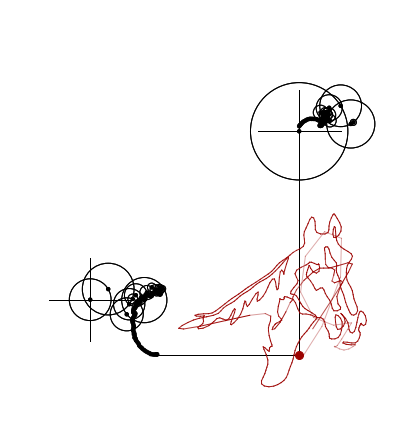

In [32]:
# The rendering will take several (5-10) minutes!
# Adjust the num_cirlces, fps, and anim_length parameters above to reduce render time. 
# Particularly when just getting started, making all of these numbers smaller will significantly 
# speed up the animation process.

xCircles = ComplexCircles(xFT, num_circles=num_circles, origin=x_origin)
yCircles = ComplexCircles(yFT, num_circles=num_circles, origin=y_origin)

#------------------------------------------------------------
# set up figure and styling
fig = plt.figure()
plt.axis([-400,75,-150,350])

ax = plt.gca()
ax.set_aspect(1)
ax.set_facecolor('#f9f9f9')

# Suppress axes
ax.set_yticklabels([])
#ax.set_xticklabels([])
plt.tight_layout(pad=0)
plt.axis('off')

circle_color = 'black'
drawing_color = '#9c0200'


#------------------------------------------------------------
# Set up animation elements


# INITIALIZE CIRLCE PLOTS
alphas = np.linspace(1, 0.25, num_circles) #np.repeat(1, num_circles)
X_circle_objs = []
X_center_objs = []
Y_circle_objs = []
Y_center_objs = []

X_radii, X_x_centers, X_y_centers, X_x_final, X_y_final = xCircles.get_circles()
Y_radii, Y_x_centers, Y_y_centers, Y_x_final, Y_y_final = yCircles.get_circles(transpose=True)


for c in range(0,num_circles):
    # X Outer Circles
    Xcirc = plt.Circle((X_x_centers[c], X_y_centers[c]), radius=X_radii[c],
                      edgecolor=circle_color, facecolor='None', alpha=alphas[c])
    X_circle_objs.append(Xcirc)
    # X Center Point Circles
    Xcenter = plt.Circle((X_x_centers[c], X_y_centers[c]), radius=2,
                      edgecolor=circle_color, facecolor=circle_color, alpha=alphas[c])
    X_center_objs.append(Xcenter)
    
    
    # Y Outer Circles
    Ycirc = plt.Circle((Y_x_centers[c], Y_y_centers[c]), radius=Y_radii[c],
                      edgecolor=circle_color, facecolor='None', alpha=alphas[c])
    Y_circle_objs.append(Ycirc)
    # Y Center Point Circles
    Ycenter = plt.Circle((Y_x_centers[c], Y_y_centers[c]), radius=2,
                      edgecolor=circle_color, facecolor=circle_color, alpha=alphas[c])
    Y_center_objs.append(Ycenter)

    
# Connectors between end of circles and actual drawing
X_connector_line, = ax.plot([], [], '-', lw=1, color='black')
Y_connector_line, = ax.plot([], [], '-', lw=1, color='black') 

# Point on plot at current time t
trace_point, = ax.plot([], [], 'o', markersize=8, color=drawing_color)

# Trace of full drawing
drawing_segments = []
for idx in range(len(xFT.t_vals)):
    segment, = ax.plot([-1000, -1001], [-1000,-1001], '-', lw=1, color=drawing_color, alpha=alpha_vals[idx])
    drawing_segments.append(segment)
# Add one more for line segment
segment, = ax.plot([-1000,-1001], [-1000,-1001], '-', lw=1, color=drawing_color, alpha=alpha_vals[0])
drawing_segments.append(segment)


# Plot axes of cirlces
x_main_offset = X_x_centers[0]
y_main_offset = Y_y_centers[0]

axis_length = 50
axis_style = {
    "linestyle": "solid",
    "linewidth": 1,
    "color": "black"
}
x_x_axis = ax.plot(
    [x_main_offset-axis_length, x_main_offset+axis_length], 
    [X_circles_spacing,X_circles_spacing],
    **axis_style
)
x_y_axis = ax.plot(
    [x_main_offset, x_main_offset], 
    [X_circles_spacing-axis_length,X_circles_spacing+axis_length],
    **axis_style
)
y_x_axis = ax.plot(
    [-Y_circles_spacing-axis_length, -Y_circles_spacing+axis_length],
    [y_main_offset, y_main_offset], 
    **axis_style
)
y_y_axis = ax.plot(
    [-Y_circles_spacing, -Y_circles_spacing],
    [y_main_offset-axis_length, y_main_offset+axis_length], 
    **axis_style
)


def init():
    """initialize animation"""
    for idx in range(len(xFT.t_vals)):
        drawing_segments[idx].set_data([],[])
    
    X_connector_line.set_data([], [])
    Y_connector_line.set_data([], [])
    trace_point.set_data([], [])
    #centers.set_data([], [])
    for c in range(num_circles):
        ax.add_patch(X_circle_objs[c])
        ax.add_patch(X_center_objs[c])
        ax.add_patch(Y_circle_objs[c])
        ax.add_patch(Y_center_objs[c])
    return([])

def animate(i):
    """perform animation step"""
        
    X_radii, X_x_centers, X_y_centers, X_x_final, X_y_final = xCircles.get_circles()
    Y_radii, Y_x_centers, Y_y_centers, Y_x_final, Y_y_final = yCircles.get_circles(transpose=True)
    #Y_x_centers = [x - circles_spacing for x in Y_x_centers]
    #Y_x_final = Y_x_final - circles_spacing

    
    for c in range(0,num_circles):
        # X Outer Circles
        X_circle_objs[c].center = (X_x_centers[c], X_y_centers[c])
        # X Center Point Circles
        X_center_objs[c].center = (X_x_centers[c], X_y_centers[c])

        # Y Outer Circles
        Y_circle_objs[c].center = (Y_x_centers[c], Y_y_centers[c])
        # Y Center Point Circles
        Y_center_objs[c].center = (Y_x_centers[c], Y_y_centers[c])
        
    
    #idx_current = max(int(np.round(xCircles.t_current)),len(xFT.fourier_approximation)-1)
    idx_current = xCircles.t_index_current
    x_true_current = deepcopy(xCircles.fourier_approx_val_current)
    y_true_current = deepcopy(yCircles.fourier_approx_val_current)
    X_connector_line.set_data(
        [x_true_current, x_true_current], 
        [y_true_current, X_y_final]
    )
    Y_connector_line.set_data(
        [Y_x_final, x_true_current], [y_true_current, y_true_current]
    )
    trace_point.set_data([x_true_current], [y_true_current])
    
    # Iterate circles to next step
    xCircles.step(dt=dt)
    yCircles.step(dt=dt)

    drawing_segments[idx_current].set_data(
        [x_true_current, xCircles.fourier_approx_val_current], 
        [y_true_current, yCircles.fourier_approx_val_current]
    )

    
    return([])


 


ani = animation.FuncAnimation(fig, animate, frames=num_frames,
                              interval=interval, blit=True, init_func=init)

HTML(ani.to_html5_video())

# If you get the "KeyError: 'ffmpeg'" error (as you could),
# then your system does not have the ffmpeg video library installed.
# You can get around this by using an alternative image library.
# COMMENT OUT the line "HTML(ani.to_html5_video())" above, and UNCOMMENT the following lines:

#from IPython.display import Image as DisplayImage
#ani.save('./animation.gif', writer='imagemagick')
#DisplayImage(url='./animation.gif')

In [33]:
# Fun miscellaneous function to draw a single frame of the 
# circles animation; understanding this step and getting the
# phase/amplitude of the circles correct is 90% of the work
# for understanding how the full animation works
def draw_circles(FT, t, num_circles=200):
    
    period = FT.period
    As = FT.amplitudes[0:num_circles]
    Zs = FT.phases[0:num_circles]

    t_vals = np.linspace(0,3000, 500)
    Xs = []
    Ys = []
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    
    x_offset = 0
    y_offset = 0

    col="#004785"
    
    for i in range(0,num_circles):
        Hz = i+1
        a = As[i] # Magnitude (i.e., amplitude) of complex coefficient
        z = Zs[i] # Argument (i.e., phase) of complex coefficient

        plt.plot([x_offset], [y_offset], marker='o', markersize=10, color=col)
        circ = plt.Circle((x_offset, y_offset), radius=2*a, edgecolor='black',
                          linewidth=2, facecolor='None')
        ax.add_patch(circ)

        x_offset += 2*a*np.cos(t*2*np.pi*Hz/period + z)
        y_offset += 2*a*np.sin(t*2*np.pi*Hz/period + z)

    Xs.append(x_offset)
    Ys.append(y_offset)
    plt.axis('equal')
    plt.show()
    return(fig)

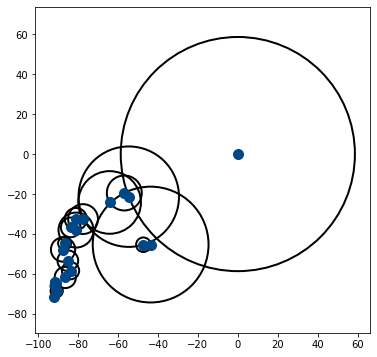

In [34]:
f = draw_circles(xFT, 1400, num_circles=20)